In [2]:
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.spatial import distance

In [3]:
pubs_author_funder = pd.read_csv("..//..//..//data//Data//DerivedData//CleanedRawData//pubs_author_funder.csv")
pubs_author_funder.head()

,id,author_country,funder_country
0,30507292,['Turkey'],['Turkey']
1,30574690,"['United States', 'France']","['United States', 'United States', 'United Sta..."
2,30574691,['Russia'],['Russia']
3,30585095,"['Spain', 'Spain']","['Spain', 'Spain', 'Spain', 'Spain', 'Spain', ..."
4,30585097,"['Germany', 'Spain']",['Spain']


In [4]:
pubs_author_funder['author_country'] = pubs_author_funder['author_country'].apply(literal_eval)
pubs_author_funder['funder_country'] = pubs_author_funder['funder_country'].apply(literal_eval)


In [5]:
pubs_author_funder['funding_units'] = pubs_author_funder['funder_country'].apply(lambda x: len(x))

In [6]:
pubs_author_funder.tail()

,id,author_country,funder_country,funding_units
7740555,65301283,"[Netherlands, Germany, Netherlands, United Sta...","[EU, Netherlands, Netherlands, Netherlands, Ne...",8
7740556,65301284,"[Turkey, Canada, Canada]","[Canada, Turkey]",2
7740557,65301319,[China],"[China, China]",2
7740558,65301320,"[Russia, United Kingdom, Russia, Ukraine]",[United Kingdom],1
7740559,65301322,[China],"[China, China]",2


In [7]:
fundingunits = pubs_author_funder.funding_units.tolist()
units_clipped = np.clip(fundingunits, 1,20)

In [8]:
np.bincount(units_clipped)

array([      0, 2470572, 1613911, 1087161,  712175,  453612,  362746,
        249434,  181848,  144796,  105553,   78366,   62844,   47241,
         34909,   27713,   20867,   16224,   12846,    9869,   47873])

In [9]:
pubs_total = pubs_author_funder.shape[0]
bin_count = np.bincount(units_clipped)[1:]
bin_count_norm = bin_count/pubs_total


In [13]:
bin_count_norm

array([0.31917226, 0.20850055, 0.14044992, 0.09200562, 0.05860196,
       0.04686302, 0.03222428, 0.02349287, 0.01870614, 0.01363635,
       0.01012407, 0.00811879, 0.00610305, 0.00450988, 0.00358023,
       0.0026958 , 0.00209597, 0.00165957, 0.00127497, 0.00618469])

Text(0, 0.5, 'probability')

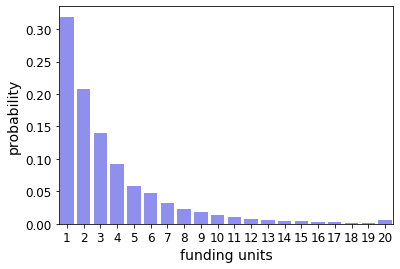

In [12]:
sns.barplot(x=np.arange(1,21,1), y=bin_count_norm, color="blue", alpha=0.5)
plt.tick_params(labelsize=12)
plt.xlabel("funding units", fontsize=14)
plt.ylabel("probability", fontsize=14)

In [14]:
cntry_out = pubs_author_funder['funder_country'].explode().reset_index()
cntry_out = cntry_out.groupby("funder_country").size().reset_index()
cntry_out.columns=['funder_country','funding_units_out']
cntry_out.head()

,funder_country,funding_units_out
0,Afghanistan,23
1,Albania,34
2,Algeria,2622
3,Andorra,53
4,Angola,76


In [15]:
explodelist = []
for index, row in pubs_author_funder.iterrows():
    units = row['funding_units']
    author_country = row['author_country']
    for item in author_country:
        templist = [item, units/len(author_country)]
        explodelist.append(templist)

In [16]:
cntry_in = pd.DataFrame(explodelist, columns=['author_country','funding_units_in'])
cntry_in.head()

,author_country,funding_units_in
0,Turkey,1.0
1,United States,2.0
2,France,2.0
3,Russia,1.0
4,Spain,3.0


In [17]:
cntry_in = cntry_in.groupby("author_country")['funding_units_in'].sum().reset_index()

In [18]:
cntry_out.shape

(191, 2)

In [19]:
cntry_in_out = cntry_in.merge(cntry_out, left_on='author_country', right_on="funder_country", how="inner")
cntry_in_out.head()

,author_country,funding_units_in,funder_country,funding_units_out
0,Afghanistan,98.758836,Afghanistan,23
1,Albania,231.615598,Albania,34
2,Algeria,5456.281375,Algeria,2622
3,Andorra,29.366258,Andorra,53
4,Angola,235.896988,Angola,76


Text(0, 0.5, 'recieve funding units')

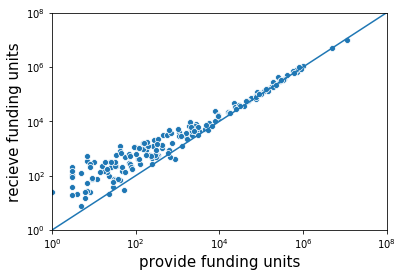

In [20]:
f, ax = plt.subplots()
ax.set(xscale="log", yscale="log")
sns.scatterplot(x="funding_units_out", y="funding_units_in", data=cntry_in_out, ax=ax)
sns.lineplot(x=[1,10**8],y=[1,10**8], ax=ax)
plt.xlim([1,10**8])
plt.ylim([1,10**8])
plt.xlabel("provide funding units", fontsize=15)
plt.ylabel('recieve funding units', fontsize=15)

In [17]:
pubs_author_funder.head()

,id,author_country,funder_country,funding_units
0,30507292,[Turkey],[Turkey],1
1,30574690,"[United States, France]","[United States, United States, United States, ...",4
2,30574691,[Russia],[Russia],1
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain]",4
4,30585097,"[Germany, Spain]",[Spain],1


In [109]:
testlist=[['p1',['c1','c2','c2'],['c1'],1],
         ['p2',['c1','c2','c3'],['c2','c2','c3'],3]]
test_df = pd.DataFrame(testlist, columns=['id','author_country','funder_country','funding_units'])
test_df

,id,author_country,funder_country,funding_units
0,p1,"[c1, c2, c2]",[c1],1
1,p2,"[c1, c2, c3]","[c2, c2, c3]",3


In [21]:
cntry_cntry_explodelist = []
for index, row in pubs_author_funder.iterrows():
    units = row['funding_units']
    author_country = row['author_country']
    funding_country=row['funder_country']
    num_author = len(author_country)
    num_funder=len(funding_country)
    for author_c in author_country:
        for funder_c in funding_country:
            credit = units/(num_author*num_funder)
            templist = [funder_c,author_c, credit]
            cntry_cntry_explodelist.append(templist)

In [22]:
cntry_cntry_df = pd.DataFrame(cntry_cntry_explodelist, columns=['source','target','value'])
cntry_cntry_df = cntry_cntry_df.groupby(['source','target'])['value'].sum().reset_index()
cntry_cntry_df

,source,target,value
0,Afghanistan,Afghanistan,0.500000
1,Afghanistan,Australia,0.333333
2,Afghanistan,Bangladesh,0.666667
3,Afghanistan,Bolivia,0.125000
4,Afghanistan,Canada,1.132576
...,...,...,...
14156,Zimbabwe,United Kingdom,9.802381
14157,Zimbabwe,United States,23.297150
14158,Zimbabwe,Vietnam,0.500000
14159,Zimbabwe,Zambia,2.242857


In [23]:
cntry_cntry_df.to_csv("..//..//..//data//Data//DerivedData//Derived//funding_source_target.csv", index=False)

In [19]:
cntry_cntry_df = pd.read_csv("..//..//data//Data//DerivedData//Derived//funding_source_target.csv")
cntry_cntry_df.head()

,source,target,value
0,Afghanistan,Afghanistan,0.500000
1,Afghanistan,Australia,0.333333
2,Afghanistan,Bangladesh,0.666667
3,Afghanistan,Bolivia,0.125000
4,Afghanistan,Canada,1.132576


In [20]:
cntry_cntry_df = cntry_cntry_df.pivot_table(
    index='source',columns='target', values='value', fill_value=0)
cntry_cntry_df.head()

target,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua & Barbuda,Argentina,Armenia,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
source,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.5,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.333333,...,2.299242,0.0,0.0,0.0,0.0,0.0,0.50,0.000000,0.0,0.0
Albania,0.0,8.833333,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.277778,...,1.000000,0.0,0.0,0.0,0.0,0.0,1.00,0.000000,0.0,0.0
Algeria,0.0,0.000000,1649.934393,0.0,0.000000,0.0,0.0,1.92619,0.0,1.997885,...,21.437491,0.0,0.0,0.0,0.0,0.0,0.25,0.333333,0.0,0.0
Andorra,0.0,0.000000,0.000000,3.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,...,3.900000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0
Angola,0.0,0.000000,0.000000,0.0,20.581349,0.0,0.0,0.00000,0.0,2.650000,...,3.602381,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0


In [79]:
cntry_cntry_df.to_csv("cntry_cntry_units.csv")

In [21]:
cntrylist = list(set(cntry_cntry_df.index) & set(cntry_cntry_df.columns)) 

In [22]:
cntry_cntry_normed = cntry_cntry_df.div(cntry_cntry_df.sum(axis=1), axis=0)
cntry_cntry_normed = cntry_cntry_normed.loc[cntrylist, cntrylist]
cntry_cntry_normed.head()

target,Trinidad and Tobago,Papua New Guinea,Fiji,Nicaragua,Cuba,Vatican,Haiti,Egypt,Burkina Faso,Guadeloupe,...,France,North Korea,Bangladesh,Turkey,Ireland,Nigeria,Djibouti,Bolivia,Uruguay,Sierra Leone
source,,,,,,,,,,,,,,,,,,,,,
Trinidad and Tobago,0.525105,0.000000,0.0000,0.000000,0.000000,0.0,0.000394,0.000000,0.000000,0.010101,...,0.008330,0.0,0.000000,0.000000,0.000000,0.003247,0.0,0.0,0.000000,0.0
Papua New Guinea,0.000000,0.268433,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.028865,0.0,0.002740,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
Fiji,0.000000,0.000000,0.3186,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.002976,0.0,0.002976,0.002551,0.000000,0.000000,0.0,0.0,0.000000,0.0
Nicaragua,0.000000,0.000000,0.0000,0.349537,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.074074,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
Cuba,0.000000,0.000000,0.0000,0.000000,0.360892,0.0,0.000000,0.000064,0.000451,0.000000,...,0.034105,0.0,0.000903,0.001673,0.000636,0.009477,0.0,0.0,0.000669,0.0


In [25]:
selffunding = pd.DataFrame(
    np.diag(cntry_cntry_normed), index=[cntry_cntry_normed.index,cntry_cntry_normed.columns]).reset_index()
selffunding.columns=['source','target','ratio']

Text(0, 0.5, 'Self Funding Ratio')

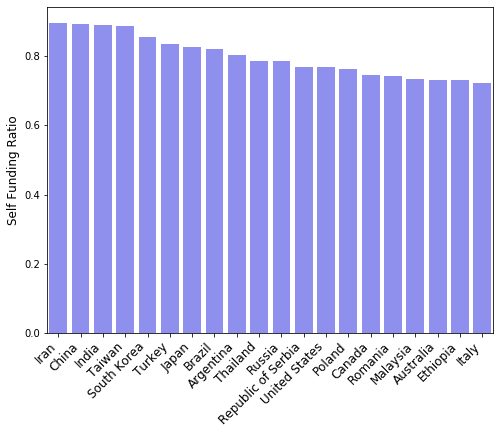

In [26]:
fig, ax = plt.subplots(figsize=(8,6))
ratio = selffunding.sort_values(by='ratio', ascending=False).head(20)['ratio'].values
xlabels = selffunding.sort_values(by='ratio', ascending=False).head(20)['source'].tolist()
sns.barplot(x = np.arange(0,20,1),y = ratio, color="blue", alpha=0.5)
plt.xticks(np.arange(0,20,1),xlabels,rotation=45, fontsize=12,ha="right")
plt.ylabel("Self Funding Ratio", fontsize=12)


Text(0, 0.5, 'Self Funding Ratio')

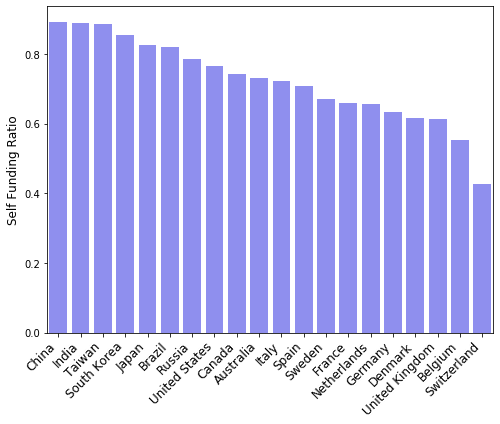

In [28]:
top20 = cntry_in_out.sort_values(by='funding_units_out',ascending=False).head(20).author_country
top20_self = selffunding[selffunding.source.isin(top20)].sort_values(by="ratio", ascending=False)
fig, ax = plt.subplots(figsize=(8,6))
ratio = top20_self['ratio'].values
xlabels = top20_self['source'].tolist()
sns.barplot(x = np.arange(0,20,1),y = ratio, color="blue", alpha=0.5)
plt.xticks(np.arange(0,20,1),xlabels,rotation=45, fontsize=12,ha="right")
plt.ylabel("Self Funding Ratio", fontsize=12)


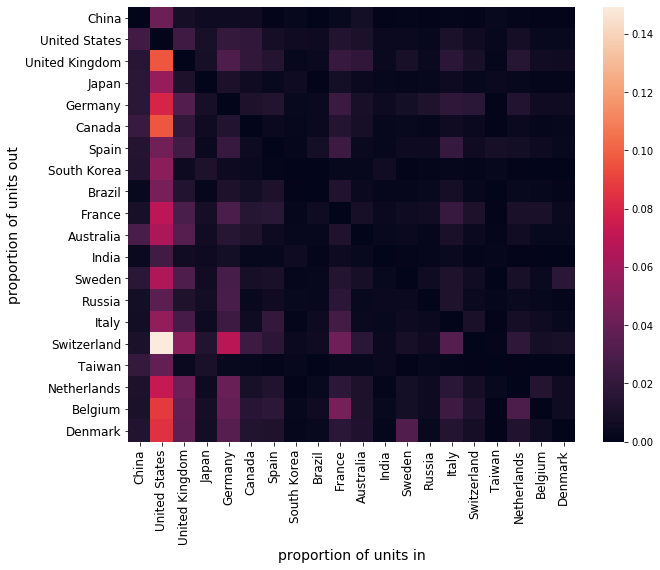

In [82]:
np.fill_diagonal(cntry_cntry_normed.values,0)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cntry_cntry_normed.loc[top20,top20])
plt.ylabel("proportion of units out", fontsize=14)
plt.xlabel("proportion of units in", fontsize=14)
plt.tick_params(axis='both',labelsize=12)

In [39]:
cntry_cntry_normed.loc[top20,top20].head()

target,China,United States,United Kingdom,Japan,Germany,Canada,Spain,South Korea,Brazil,France,Australia,India,Sweden,Russia,Italy,Switzerland,Taiwan,Netherlands,Belgium,Denmark
source,,,,,,,,,,,,,,,,,,,,
China,0.000000,0.041236,0.008255,0.005540,0.005433,0.005988,0.001127,0.002494,0.000339,0.003352,0.008077,0.000734,0.001679,0.001001,0.001252,0.000761,0.003094,0.001556,0.000853,0.000823
United States,0.026038,0.000000,0.024876,0.009517,0.020439,0.019497,0.008377,0.005843,0.004685,0.013485,0.010500,0.003550,0.004579,0.002798,0.010780,0.005902,0.002462,0.008247,0.003229,0.003464
United Kingdom,0.016147,0.096426,0.000000,0.008926,0.030485,0.019483,0.014332,0.002600,0.004605,0.021985,0.019181,0.004455,0.009635,0.003591,0.017422,0.009709,0.001890,0.015501,0.006461,0.006387
Japan,0.016439,0.056044,0.011151,0.000000,0.011036,0.006039,0.003294,0.005605,0.001036,0.007804,0.004308,0.002637,0.002070,0.002462,0.004910,0.002666,0.003678,0.002734,0.001622,0.001226
Germany,0.016366,0.079639,0.032613,0.008820,0.000000,0.011275,0.013915,0.002970,0.004442,0.023064,0.009498,0.004785,0.007593,0.011882,0.018341,0.016713,0.001053,0.013834,0.005894,0.005396


In [41]:
from itertools import permutations


In [66]:
ratio_df = pd.DataFrame(index=top20, columns=top20)
for s, t in permutations(top20,2):
    prv = cntry_cntry_df.loc[s,t]
    rec = cntry_cntry_df.loc[t,s]
    benefit = rec/prv
    ratio_df.loc[s,t]=benefit
ratio_df.head()

author_country,China,United States,United Kingdom,Japan,Germany,Canada,Spain,South Korea,Brazil,France,Australia,India,Sweden,Russia,Italy,Switzerland,Taiwan,Netherlands,Belgium,Denmark
author_country,,,,,,,,,,,,,,,,,,,,
China,NaN,0.550713,0.319406,0.446594,0.43302,0.507113,1.54954,0.672525,0.968064,0.282802,0.299286,0.357248,0.594771,0.450628,0.295427,0.657144,0.305137,0.288838,0.415417,0.505324
United States,1.81583,NaN,0.725768,1.01625,0.642179,0.766219,0.728911,1.23934,1.1479,0.574866,0.583134,0.621811,0.962509,0.808844,0.290293,1.35856,0.815444,0.397895,1.01881,0.854491
United Kingdom,3.13081,1.37785,NaN,1.1515,0.941691,0.822079,1.34708,1.43404,1.89685,0.805093,0.880106,0.708521,1.15304,1.13549,0.47041,1.52494,0.676066,0.630558,1.17458,1.08936
Japan,2.23917,0.98401,0.86843,NaN,0.763297,0.857357,1.12068,1.65867,1.33292,0.7156,0.864353,0.969146,1.2741,1.14515,0.351469,1.58221,0.827287,0.461996,1.10615,1.19226
Germany,2.30936,1.5572,1.06192,1.31011,NaN,1.14927,1.3714,1.46642,1.82327,0.869551,0.938205,0.851958,1.51768,0.95588,0.456026,1.33465,0.965405,0.780504,1.47825,1.32494


In [67]:
np.fill_diagonal(ratio_df.values, 1)
ratio_df = ratio_df.astype(float)

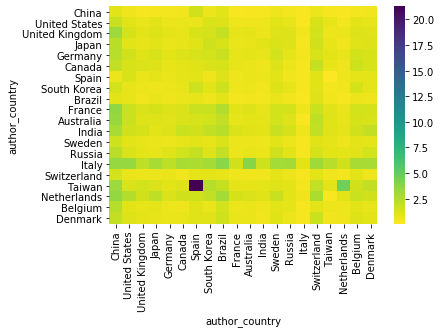

In [51]:
sns.heatmap(ratio_df,cmap="viridis_r")

In [85]:
cntry_cntry_normed.head()

target,Trinidad and Tobago,Papua New Guinea,Fiji,Nicaragua,Cuba,Vatican,Haiti,Egypt,Burkina Faso,Guadeloupe,...,France,North Korea,Bangladesh,Turkey,Ireland,Nigeria,Djibouti,Bolivia,Uruguay,Sierra Leone
source,,,,,,,,,,,,,,,,,,,,,
Trinidad and Tobago,0.0,0.0,0.0,0.0,0.0,0.0,0.000394,0.000000,0.000000,0.010101,...,0.008330,0.0,0.000000,0.000000,0.000000,0.003247,0.0,0.0,0.000000,0.0
Papua New Guinea,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.028865,0.0,0.002740,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
Fiji,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.002976,0.0,0.002976,0.002551,0.000000,0.000000,0.0,0.0,0.000000,0.0
Nicaragua,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.074074,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
Cuba,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000064,0.000451,0.000000,...,0.034105,0.0,0.000903,0.001673,0.000636,0.009477,0.0,0.0,0.000669,0.0


In [ ]:
cntry

/home/miaoli/conda/envs/funding/lib/python3.8/site-packages/seaborn/matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


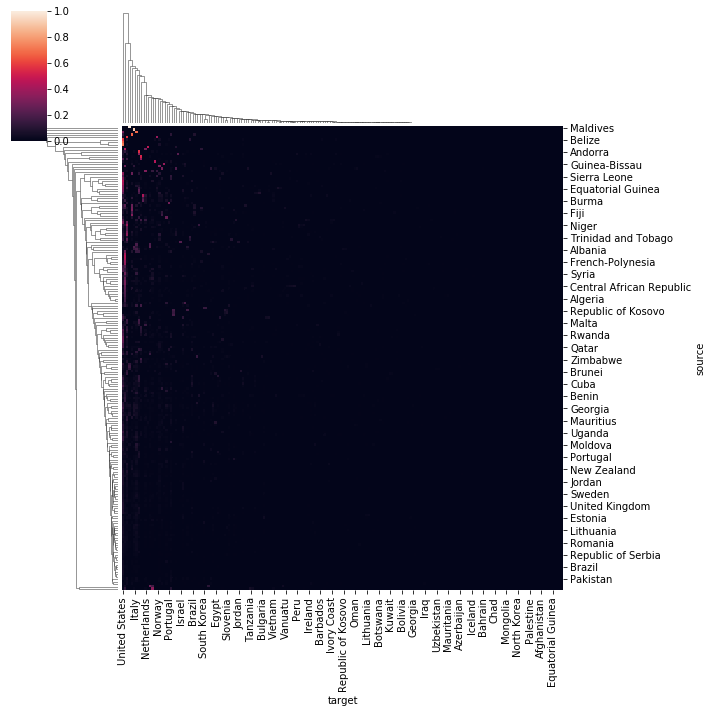

In [83]:
sns.clustermap(cntry_cntry_normed)

([<matplotlib.axis.YTick at 0x7f7f22ce9130>,
 <a list of 20 Text yticklabel objects>)

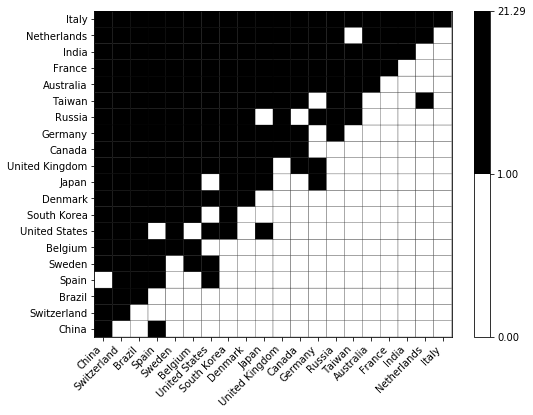

In [78]:
from matplotlib import colors
fig, ax=plt.subplots(figsize=(8,6))
cmap = colors.ListedColormap(['white','black'])
upperbounds=ratio_df.max().max()
bounds=[0, 1, upperbounds]
norm = colors.BoundaryNorm(bounds, cmap.N)
heatmap = plt.pcolor(np.array(test), cmap=cmap,norm=norm,edgecolors='black')
plt.colorbar(heatmap)
plt.xticks(np.arange(0,20,1)+0.5,test.index.tolist(),rotation=45, fontsize=10,ha="right")
plt.yticks(np.arange(0,20,1)+0.5,test.index.tolist(),fontsize=10)
#plt.ylabel("Countries",fontsize=15)
#plt.xlabel("Disciplines",fontsize=15)
#

In [73]:
def order_rca_matrix(rca_df, ascending_flag_dis=False, ascending_flag_cntry=True):
    """ rearrange the rca matrix for nestedness

    input:
        rca_df: RCA values for each country (row) and each discipline (column)

    returns:
        order_rca_df: disciplines and countries are ordered in descending order
                      in terms of the number of RCA>1 disciplines and the number
                      of RCA>1 countries respectively.

    """

    # sorting the columns (disciplines)
    num_highrca_cntry_per_dis = rca_df.gt(1.0).sum(axis=0)
    sorted_dis_list = list(
        num_highrca_cntry_per_dis.sort_values(ascending=ascending_flag_dis).index
    )
    ordered_rca_df = rca_df[sorted_dis_list]

    # sorting the rows (countries)
    num_highrca_dis_per_cntry = rca_df.gt(1.0).sum(axis=1)
    sorted_cntry_list = list(
        num_highrca_dis_per_cntry.sort_values(ascending=ascending_flag_cntry).index
    )
    ordered_rca_df = ordered_rca_df.reindex(sorted_cntry_list)

    return ordered_rca_df

In [75]:
test = order_rca_matrix(ratio_df)